In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
DATA_DIR = Path("data")
DANES_ROOT = DATA_DIR / Path("imm_face_db")
IBUG_ROOT = DATA_DIR / Path("ibug_300W_large_face_landmark_dataset")
train_xml = IBUG_ROOT / Path("labels_ibug_300W_train.xml")
test_xml = IBUG_ROOT / Path("labels_ibug_300W_test_parsed.xml")

assert DATA_DIR.exists()
assert DANES_ROOT.exists()
assert IBUG_ROOT.exists()

In [78]:
%%capture
if not IBUG_ROOT.exists():
    !wget https://people.eecs.berkeley.edu/~zhecao/ibug_300W_large_face_landmark_dataset.zip
    !unzip 'data ibug_300W_large_face_landmark_dataset.zip'    
    !rm -r 'ibug_300W_large_face_landmark_dataset.zip'
    !mv ibug_300W_large_face_landmark_dataset data

In [79]:
import random
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import torch
import torchvision.transforms as TT
from torch.utils.data import DataLoader

import cnn
from data import (
    FaceKeypointsTrainDataset,
    FaceKeypointsValidDataset,
    LargeTestDataset,
    LargeTrainDataset,
    LargeValidDataset,
    NoseKeypointTrainDataset,
    NoseKeypointValidDataset,
    part1_augment,
    part2_augment,
    part3_augment,
)
from display import show_keypoints, show_progress
from learn import test, train, train_and_validate, validate

# Part 1

In [80]:
training_set1 = NoseKeypointTrainDataset()
validation_set1 = NoseKeypointValidDataset()


assert len(training_set1) == 192, len(training_set1)
assert len(validation_set1) == 48, len(validation_set1)

In [81]:
batch_size = 64
train_loader1 = DataLoader(training_set1, batch_size=batch_size, shuffle=True)
valid_loader1 = DataLoader(validation_set1, batch_size=batch_size, shuffle=False)

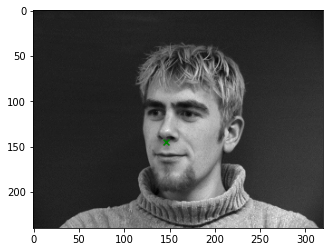

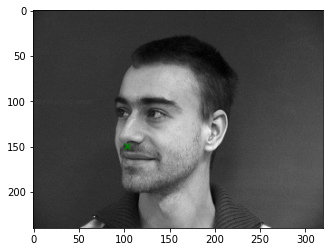

In [82]:
show_keypoints(training_set1[2][0], training_set1[2][1])
show_keypoints(training_set1[134][0], training_set1[134][1])

  0%|          | 0/20 [00:00<?, ?it/s]

batch0 0.008382474072277546


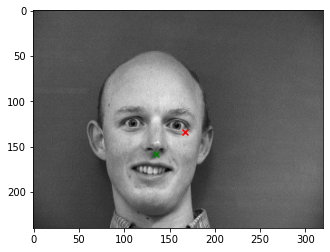

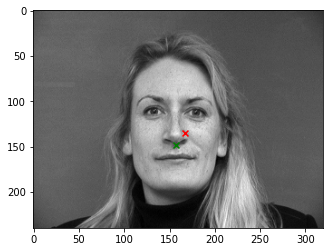

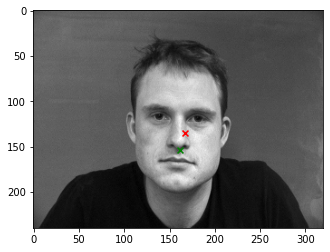

  5%|▌         | 1/20 [00:03<00:57,  3.02s/it]

batch0 0.005346590653061867


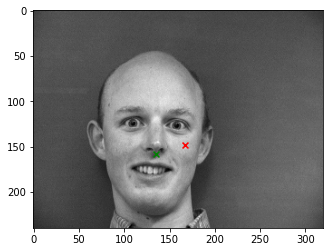

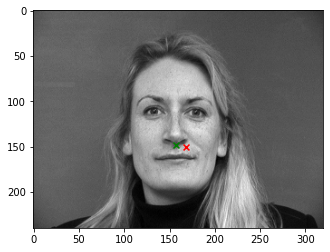

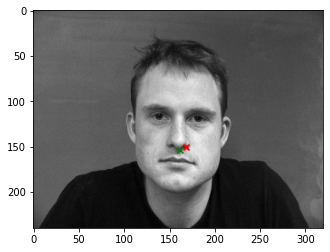

 10%|█         | 2/20 [00:05<00:53,  2.99s/it]

batch0 0.005094720982015133


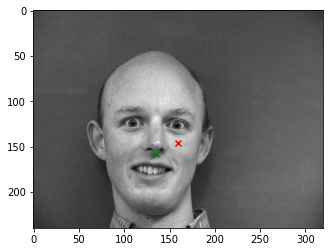

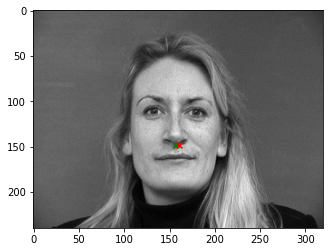

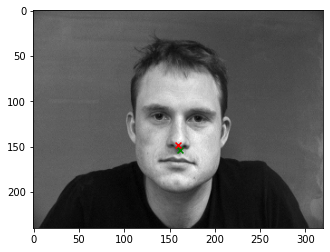

 15%|█▌        | 3/20 [00:08<00:50,  2.99s/it]

batch0 0.005171152763068676


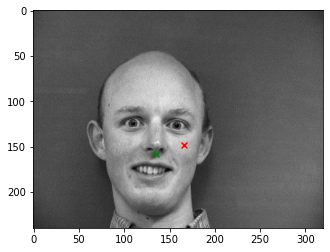

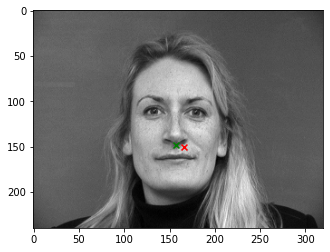

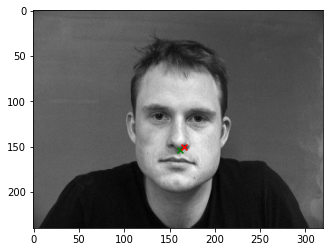

 20%|██        | 4/20 [00:11<00:47,  2.98s/it]

batch0 0.00477093318477273


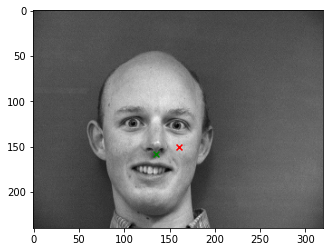

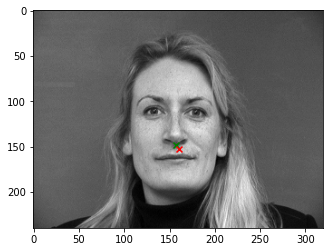

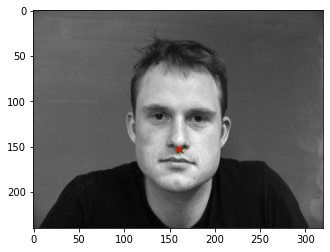

 25%|██▌       | 5/20 [00:14<00:44,  2.98s/it]

batch0 0.005182956345379353


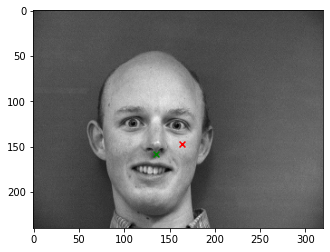

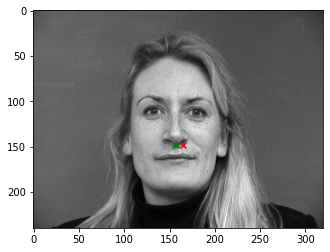

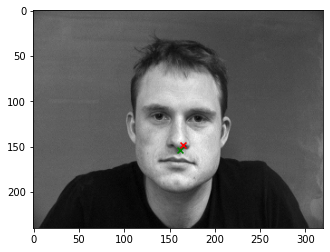

 30%|███       | 6/20 [00:17<00:41,  2.97s/it]

batch0 0.004852358717471361


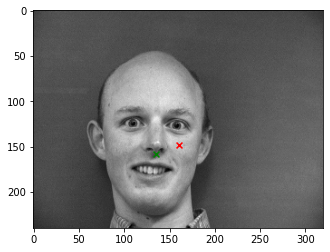

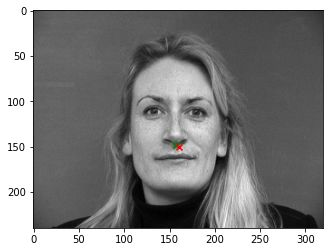

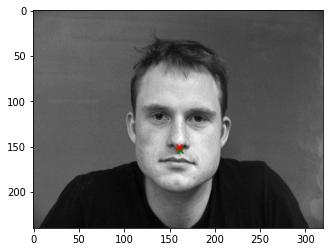

 35%|███▌      | 7/20 [00:20<00:38,  2.98s/it]

batch0 0.005123655311763287


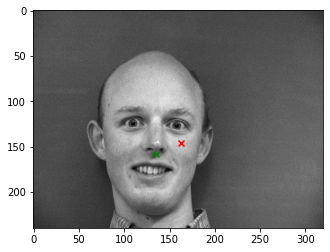

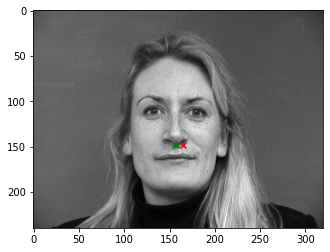

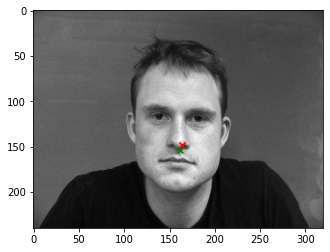

 40%|████      | 8/20 [00:23<00:35,  2.96s/it]

batch0 0.004714643582701683


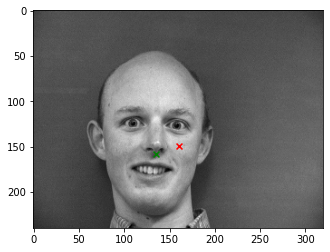

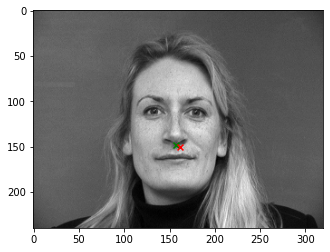

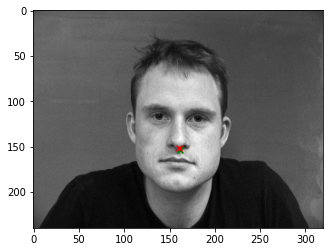

 45%|████▌     | 9/20 [00:26<00:32,  2.95s/it]

batch0 0.004479837138205767


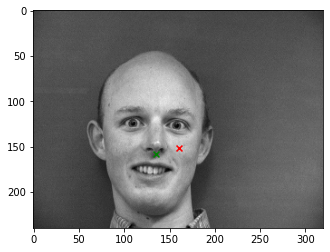

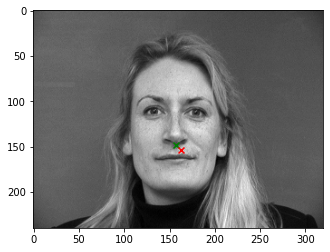

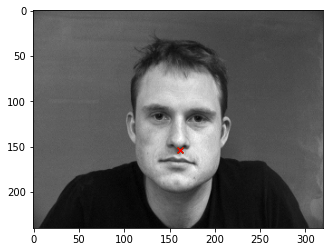

 50%|█████     | 10/20 [00:29<00:29,  2.94s/it]

batch0 0.004495567642152309


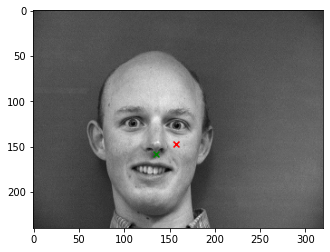

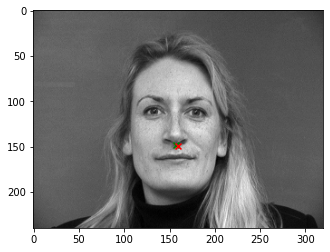

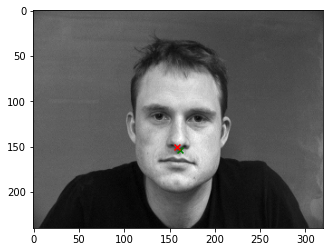

 55%|█████▌    | 11/20 [00:32<00:26,  2.94s/it]

batch0 0.004495305474847555


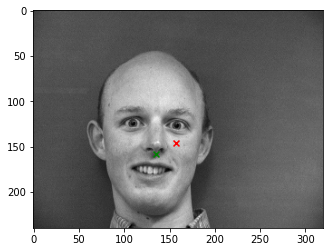

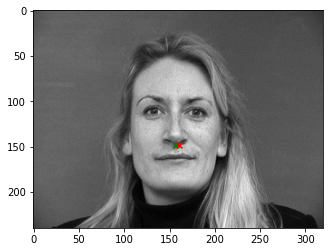

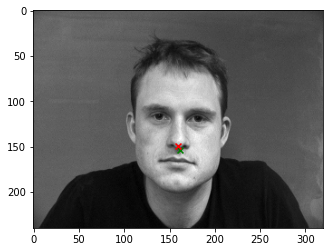

 60%|██████    | 12/20 [00:35<00:23,  2.93s/it]

batch0 0.004212008789181709


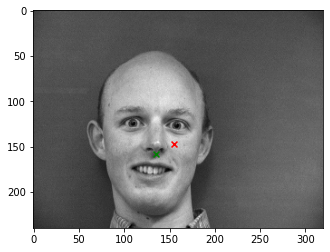

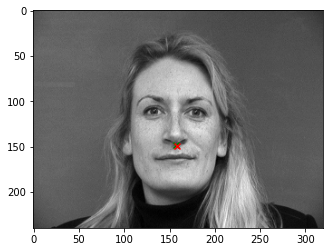

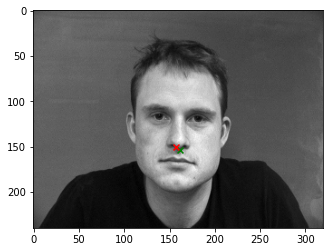

 65%|██████▌   | 13/20 [00:38<00:20,  2.91s/it]

batch0 0.0038902319502085447


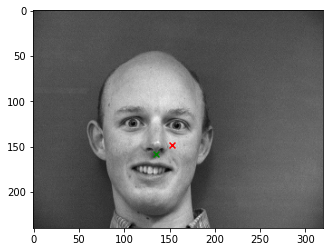

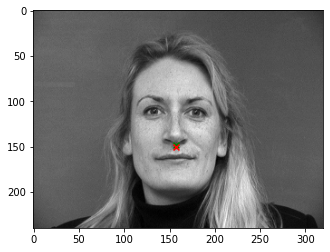

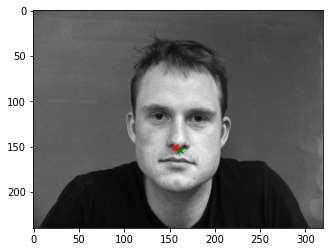

 70%|███████   | 14/20 [00:41<00:17,  2.93s/it]

batch0 0.003949055448174477


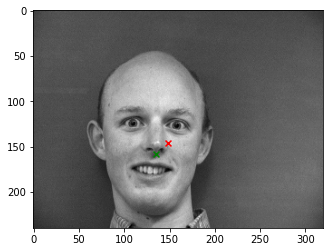

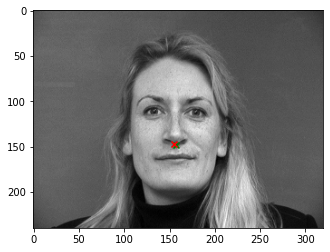

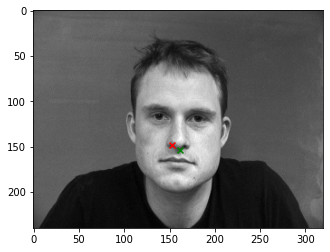

 75%|███████▌  | 15/20 [00:44<00:14,  2.93s/it]

batch0 0.003475199220702052


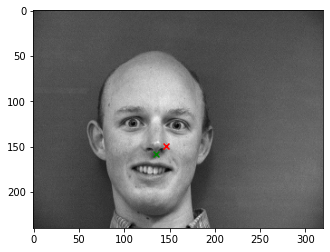

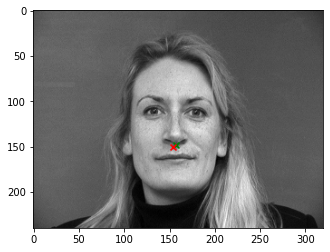

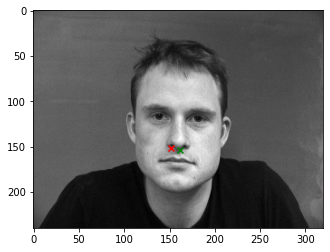

 80%|████████  | 16/20 [00:47<00:11,  2.92s/it]

batch0 0.003083143848925829


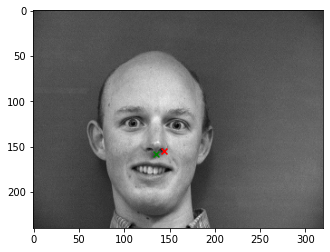

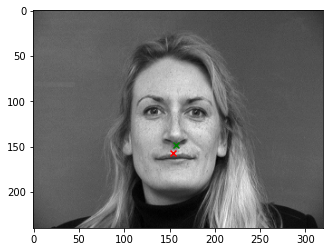

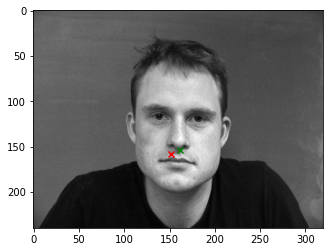

 85%|████████▌ | 17/20 [00:49<00:08,  2.91s/it]

batch0 0.003410907229408622


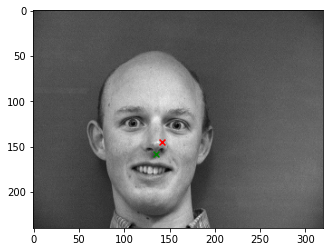

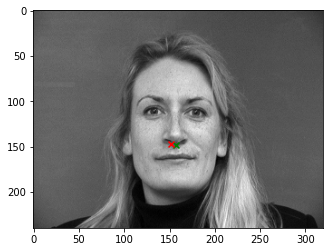

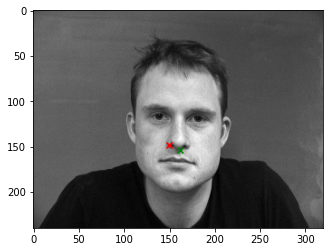

 90%|█████████ | 18/20 [00:53<00:06,  3.02s/it]

batch0 0.0032105043064802885


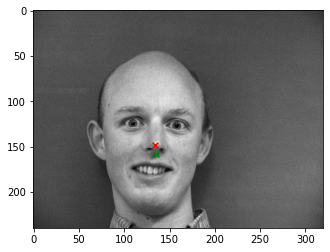

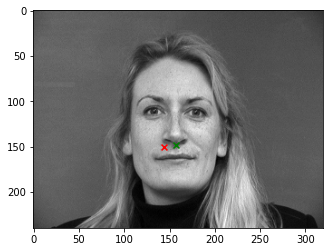

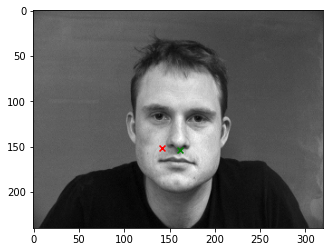

 95%|█████████▌| 19/20 [00:56<00:03,  3.22s/it]

batch0 0.0030655893497169018


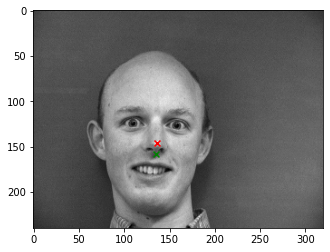

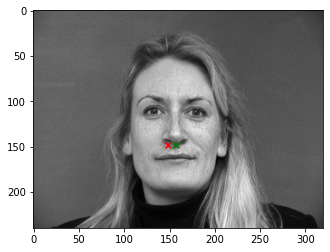

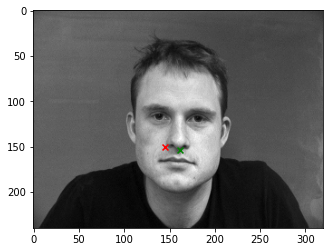

100%|██████████| 20/20 [00:59<00:00,  2.99s/it]


0.0035420010564848788


In [83]:
# Training and Testing

model1 = cnn.NoseFinder()
epochs = 20
learn_rate = 3e-4
show_every = 1

train_loss1, valid_loss1 = train_and_validate(
    train_loader1, valid_loader1, model1, epochs, learn_rate, show_every
)

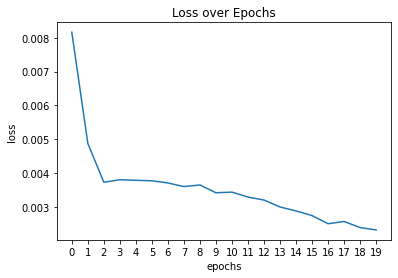

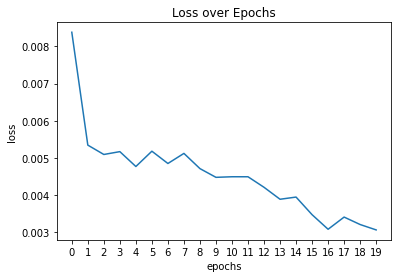

In [84]:
# Plot training and validation loss progress
show_progress(train_loss1)
show_progress(valid_loss1)

In [85]:
results1, _ = validate(valid_loader1, model1, show_every=None)

batch0 0.0030655893497169018



In [ ]:
valid_imgs1, valid_keypts1, valid_preds1 = (
    torch.stack(results1[0]),
    torch.stack(results1[1]),
    torch.stack(results1[2]),
)

for i in range(len(validation_set1)):
    show_keypoints(
        image=validation_set1[i],
        truth_points=valid_keypts1[i],
        pred_points=valid_preds1[i],
    )

In [86]:
# TODO pick success and failure cases to display

# Part 2

In [87]:
training_set2 = FaceKeypointsTrainDataset()
validation_set2 = FaceKeypointsValidDataset()

assert len(training_set2) == 192
assert len(validation_set2) == 48
# Initialize Dataloaders

batch_size = 64
train_loader2 = DataLoader(training_set2, batch_size=batch_size, shuffle=True)
valid_loader2 = DataLoader(validation_set2, batch_size=batch_size, shuffle=False)

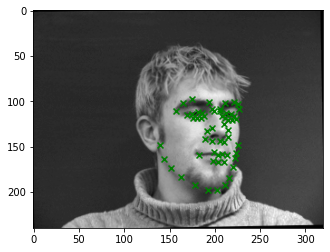

In [88]:
# Plotting a few input images and their face keypoints.

sample = training_set2[3]
image, points = sample
show_keypoints(image, points)

  0%|          | 0/20 [00:00<?, ?it/s]

batch0 0.017710737884044647


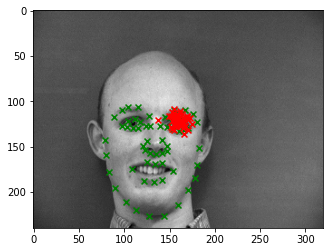

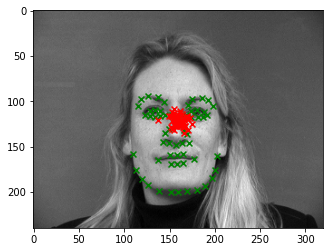

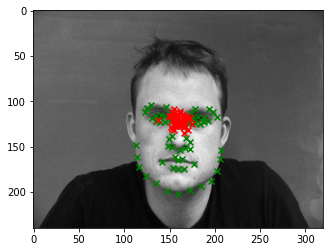

  5%|▌         | 1/20 [00:03<01:07,  3.53s/it]

 10%|█         | 2/20 [00:05<00:57,  3.19s/it]

 15%|█▌        | 3/20 [00:08<00:50,  2.95s/it]

batch0 0.012725760228931904


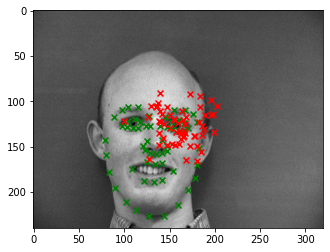

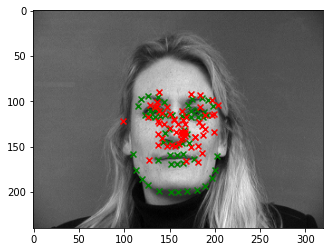

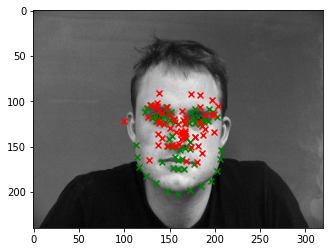

 20%|██        | 4/20 [00:12<00:52,  3.30s/it]

 25%|██▌       | 5/20 [00:15<00:46,  3.11s/it]

 30%|███       | 6/20 [00:17<00:41,  2.94s/it]

batch0 0.009671667590737343


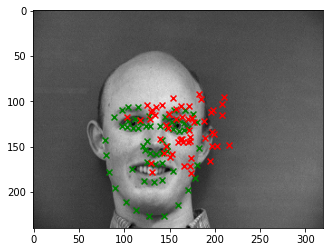

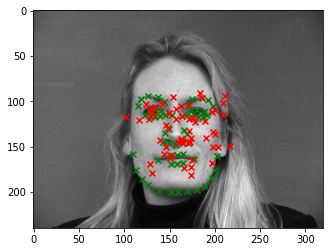

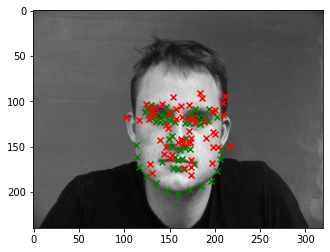

 35%|███▌      | 7/20 [00:21<00:40,  3.14s/it]

 40%|████      | 8/20 [00:23<00:35,  2.95s/it]

 45%|████▌     | 9/20 [00:26<00:30,  2.80s/it]

batch0 0.006978631019592285


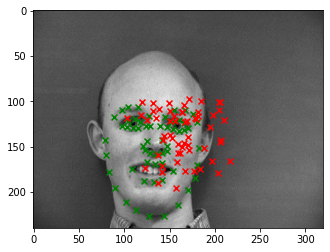

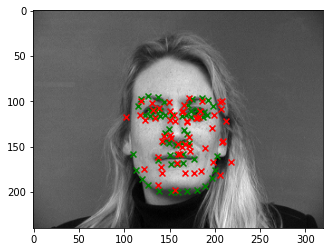

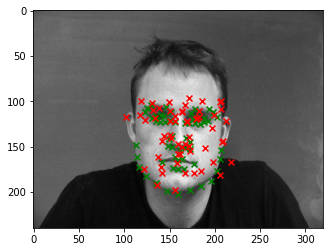

 50%|█████     | 10/20 [00:29<00:30,  3.07s/it]

 55%|█████▌    | 11/20 [00:32<00:26,  2.93s/it]

 60%|██████    | 12/20 [00:35<00:22,  2.86s/it]

batch0 0.0052121481858193874


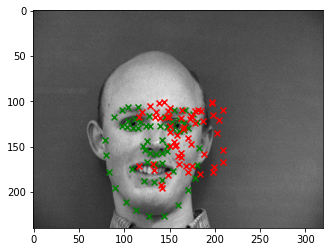

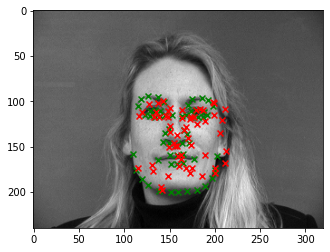

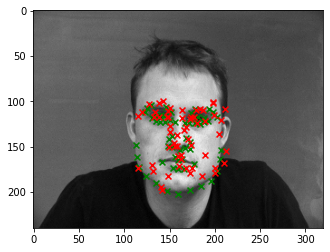

 65%|██████▌   | 13/20 [00:38<00:21,  3.12s/it]

 70%|███████   | 14/20 [00:41<00:17,  2.93s/it]

 75%|███████▌  | 15/20 [00:43<00:13,  2.79s/it]

batch0 0.004167886450886726


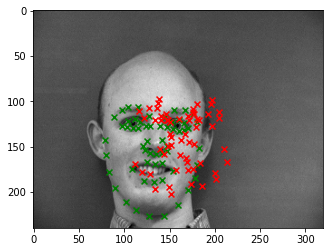

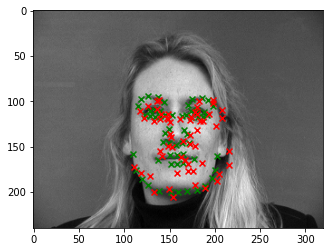

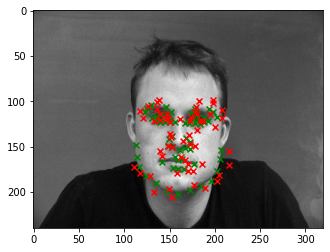

 80%|████████  | 16/20 [00:47<00:12,  3.05s/it]

 85%|████████▌ | 17/20 [00:50<00:08,  2.93s/it]

 90%|█████████ | 18/20 [00:52<00:05,  2.79s/it]

batch0 0.004096248187124729


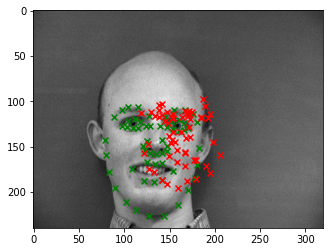

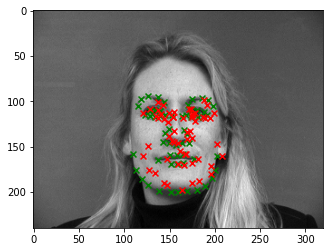

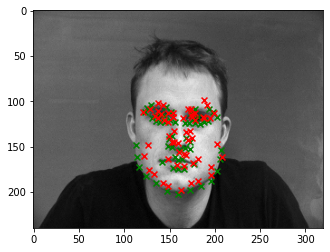

 95%|█████████▌| 19/20 [00:56<00:03,  3.06s/it]

100%|██████████| 20/20 [00:58<00:00,  2.94s/it]


0.007095752322735885


In [89]:
# Training and Testing

model2 = cnn.FaceFinder()
epochs = 20
learn_rate = 3e-4
show_every = 3

train_loss2, valid_loss2 = train_and_validate(
    train_loader2, valid_loader2, model2, epochs, learn_rate, show_every
)

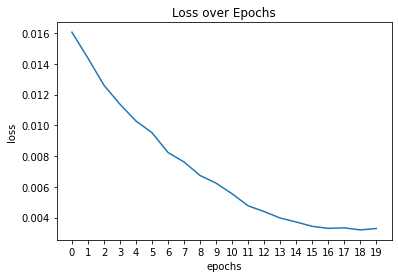

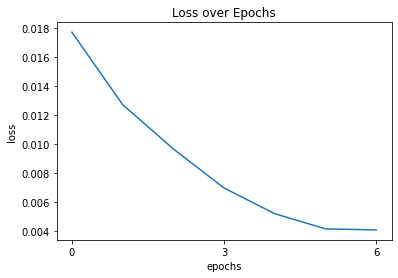

In [90]:
# Plot training and validation loss progress
show_progress(train_loss2)
show_progress(valid_loss2)

In [91]:
results2, _ = validate(valid_loader2, model2, show_every=None)

batch0 0.003920295275747776



In [92]:
# TODO pick success and failure cases to display

In [ ]:
valid_imgs2, valid_keypts2, valid_preds2 = (
    torch.stack(results2[0]),
    torch.stack(results2[1]),
    torch.stack(results2[2]),
)

for i in random.sample(range(len(validation_set2)), k=10):
    show_keypoints(
        image=validation_set2[i],
        truth_points=valid_keypts2[i],
        pred_points=valid_preds2[i],
    )

In [ ]:
figs = show_filters_part2(model2)

# Part 3

In [102]:
training_set3 = LargeTrainDataset()
validation_set3 = LargeValidDataset()
test_set3 = LargeTestDataset()

# Initialize Dataloaders
batch_size = 512
train_loader3 = DataLoader(training_set3, batch_size=batch_size, shuffle=True)
valid_loader3 = DataLoader(validation_set3, batch_size=batch_size, shuffle=False)
test_loader3 = DataLoader(test_set3, batch_size=batch_size, shuffle=False)

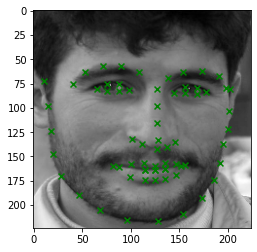

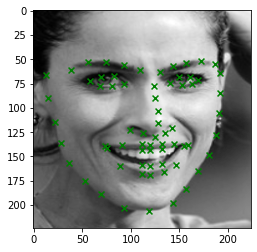

In [103]:
show_keypoints(training_set3[2][0], training_set3[2][1])
show_keypoints(training_set3[134][0], training_set3[134][1])

  0%|          | 0/20 [00:00<?, ?it/s]

batch0 0.004501189570873976


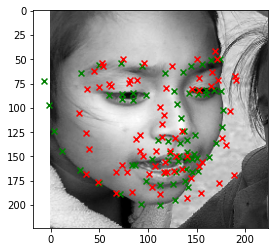

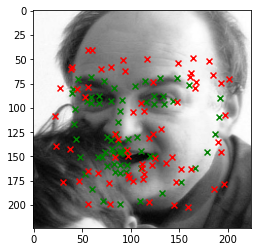

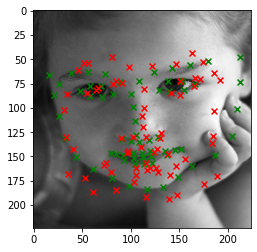

batch1 0.004442987963557243


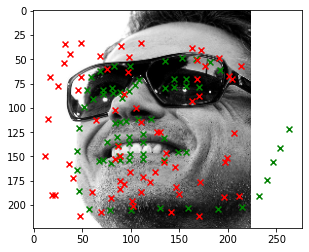

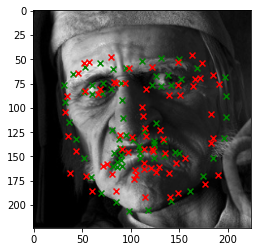

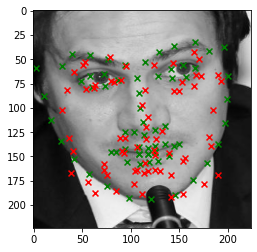

  5%|▌         | 1/20 [04:24<1:23:38, 264.12s/it]

batch0 0.003265413688495755


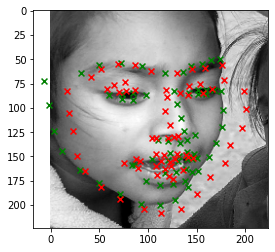

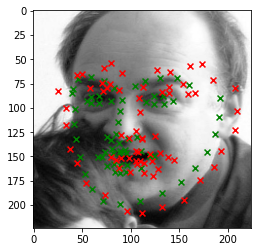

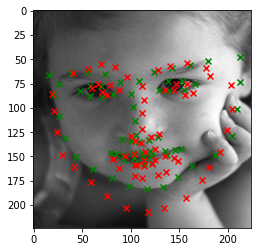

batch1 0.003229874884709716


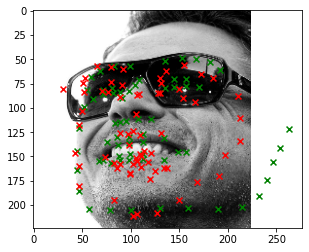

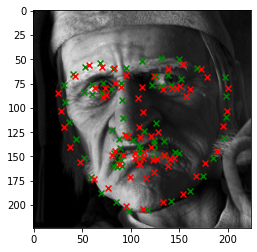

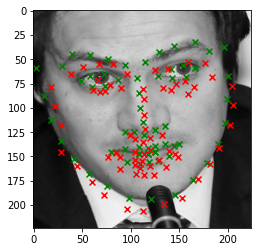

 10%|█         | 2/20 [08:46<1:19:02, 263.48s/it]

batch0 0.00249860854819417


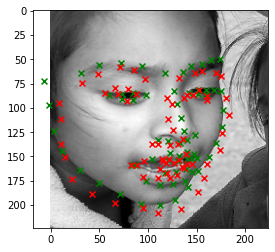

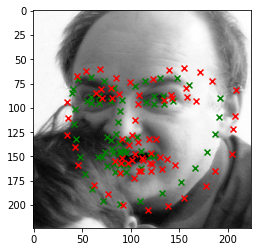

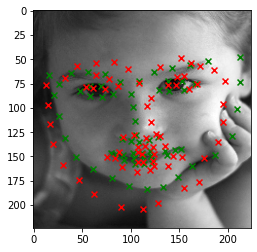

batch1 0.0024340772069990635


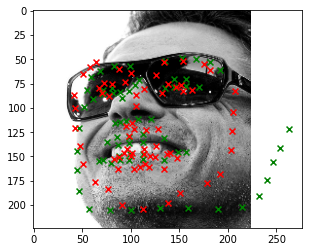

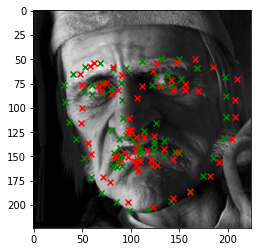

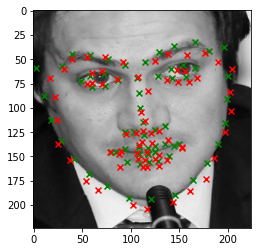

 15%|█▌        | 3/20 [13:12<1:14:54, 264.40s/it]

In [ ]:
# Training and Testing
model3 = cnn.ResNet()
epochs = 20
learn_rate = 3e-4
show_every = 1

train_loss3, valid_loss3 = train_and_validate(
    train_loader3, valid_loader3, model3, epochs, learn_rate, show_every
)

In [ ]:
# Plot training and validation loss progress
show_progress(train_loss3)
show_progress(valid_loss3)

In [ ]:
results3 = test(test_loader3, model3)

In [ ]:
test_imgs3, test_preds3 = torch.stack(results3[0]), torch.stack(results3[1])

for i in random.sample(range(1008), k=6):
    show_keypoints(image=test_imgs3[i], truth_points=None, pred_points=test_preds3[i])